# Regressão Linear 
***

## Importanto Bibliotecas

In [1]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Classes dos modelo
from sklearn.linear_model import LinearRegression

#Funções de avaliação dos modelos
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### **Estimando o salário**

In [2]:
salary = pd.read_csv('https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/salary.csv')

É possível estimar o salário dado a experiência do funcionário?

In [3]:
salary.head(10)

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [4]:
salary.shape

(40, 2)

### Separando o conjunto de dados

In [5]:
X = salary[['Experience Years']]
y = salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

### Treinando o modelo

A regressão linear é um modelo de regressão. Lembrando da fómula da equação linear: $y = a \times x  + b$

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Avaliando o modelo

MSE = $\frac{1}{n} \sum\limits_{i = 1}^{n}(y_i-\hat{y_i})^2$

O erro quadrático médio (Mean Squared Error) calcula a média dos quadrados dos erros, ou seja, as diferenças entre os valores reais ($y_i$) e os valores previstos ($\hat{y_i}$).

<!-- <img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png" alt="Descrição da MSE" width="600"/> -->

<div style="overflow: hidden;">
    <img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png" alt="Descrição da MSE" style="margin-top: -30px; width: 600px;"/>
</div>

In [8]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 37795186.9705588
R2_score: 0.9288879718237593


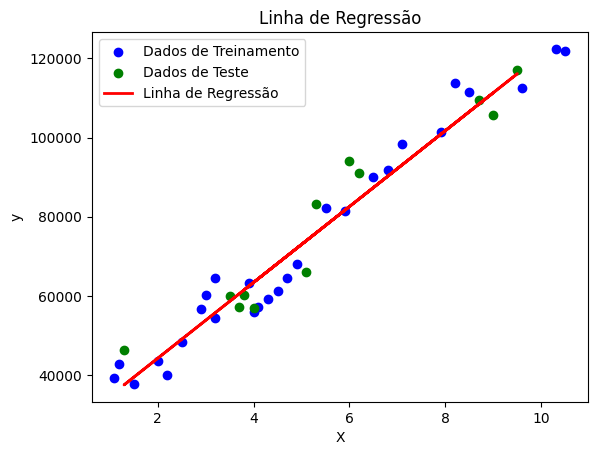

In [9]:
# Dados de treinamento e teste
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')

# Linha de regressão
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linha de Regressão')
plt.legend()
plt.show()

In [25]:
difference_pred = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
difference_pred

,True Value,Predicted value,Difference
731,14999,47463.07,-32464.07
518,31200,38686.18,-7486.18
12722,125300,80633.02,44666.98
13823,22400,30634.44,-8234.44
22029,56300,123085.45,-66785.45
...,...,...,...
19228,14999,18628.95,-3629.95
16124,75200,45318.32,29881.68
10624,25400,21913.13,3486.87
16729,38600,43882.97,-5282.97


### **Iris**

É possível estimar o tamanho da sépala considerando as outras features?

In [11]:
dataset = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv")

X = dataset[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = dataset['SepalLengthCm']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 0.15368327002893006
R2_score: 0.8057401679386005


### **Preço de casas**

**House-16H dataset**:

A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região.

[Saiba mais aqui](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1)

In [15]:
dataset = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/house.csv")

In [16]:
dataset.columns

Index(['Price', 'P1', ' P5p1', ' P6p2', ' P11p4', ' P14p9', ' P15p1', ' P15p3',
       ' P16p2', ' P18p2', ' P27p4', ' H2p2', ' H8p2', ' H10p1', ' H13p1',
       ' H18pA', ' H40p4'],
      dtype='object')

In [17]:
dataset.head(10)

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667
5,14999,133,0.466165,0.000000,0.248120,0.239437,0.812030,0.000000,0.644068,0.016949,0.016949,0.271605,0.000000,1.000000,0.197531,0.000000,1.000000
6,25500,267,0.460674,0.000000,0.134831,0.131944,0.913858,0.000000,0.776596,0.000000,0.021277,0.153153,0.000000,0.989362,0.297297,0.240000,0.000000
7,23800,248,0.491936,0.161290,0.197581,0.126984,0.911290,0.000000,0.787234,0.000000,0.021277,0.104762,0.127660,1.000000,0.161905,0.115385,1.000000
8,134600,6614,0.498790,0.004687,0.072120,0.058220,0.937406,0.000000,0.847794,0.001983,0.039167,0.014656,0.004462,0.994546,0.100147,0.134503,0.400000
9,28900,22995,0.492890,0.001000,0.039356,0.034560,0.978213,0.000000,0.926131,0.003436,0.012789,0.038539,0.001336,0.070624,0.467058,0.364839,0.782609


In [18]:
dataset.describe()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
count,22784.000000,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,50074.439782,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626
std,52843.475551,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655
min,0.000000,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000
25%,21000.000000,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221673,0.052770,0.243243
50%,33200.000000,1.345500e+03,0.480396,0.003413,0.155485,0.117127,0.863645,0.000000,0.714286,0.002591,0.027523,0.081179,0.002538,0.994100,0.299800,0.086957,0.500000
75%,56100.000000,4.518250e+03,0.496040,0.033376,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029928,1.000000,0.375000,0.137931,0.750000
max,500001.000000,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X = dataset.drop(["Price"], axis = 1)
# remoção é feita nas colunas (eixo 1), não nas linhas (eixo 0)
y = dataset["Price"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 2117262379.7949326
R2_score: 0.2442585042734119


In [22]:
pred_y_df = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
pred_y_df

,True Value,Predicted value,Difference
731,14999,47463.07,-32464.07
518,31200,38686.18,-7486.18
12722,125300,80633.02,44666.98
13823,22400,30634.44,-8234.44
22029,56300,123085.45,-66785.45
...,...,...,...
19228,14999,18628.95,-3629.95
16124,75200,45318.32,29881.68
10624,25400,21913.13,3486.87
16729,38600,43882.97,-5282.97


**PERGUNTA**: Por que o modelo tem um desempenho tão baixo?

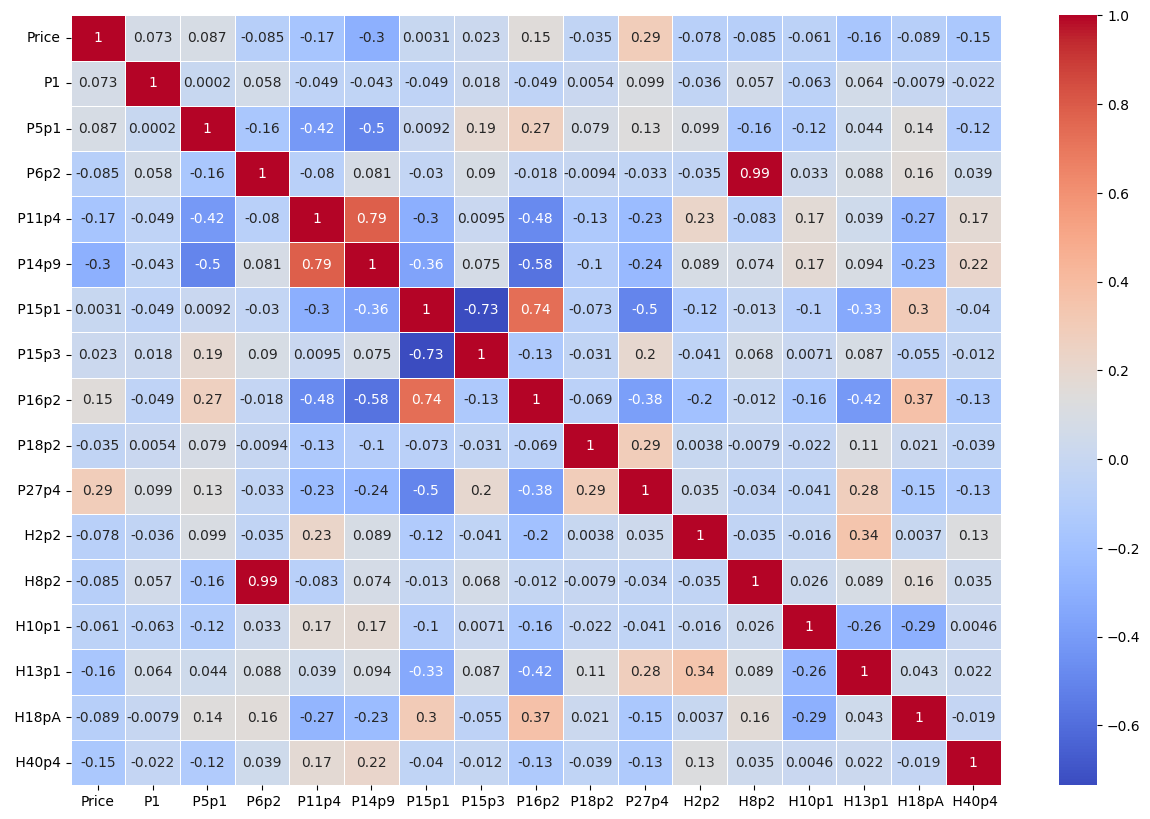

In [23]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()